The first step–before we start to build a model–is always to take a closer look at the data by analyzing
some statistics of the data set. In this step, you can already gain some insights into the data which can
help you build your model and interpret your results later on.
Look into the provided data set by e.g. plotting the individual features. Based on your analysis,
answer the following questions:
(i) Which are the numerical features and which are the categorical features?
(ii) Is there a greater trend to need an increase in the availability of bicycles? Study this question
from various perspectives:
• Can any trend be seen comparing different hours, weeks, and months?
• Is there any difference between weekdays and holidays?
• Is there any trend depending on the weather? Rainy days, snowy days, etc.
Write concise answers to each question and support your findings with evidence (statistics, plots,
etc.). Discuss the results. Additionally, you can explore the correlation of features, outliers, range of
values, and many more aspects

In [90]:
import pandas as pd
df = pd.read_csv('training_data_ht2025.csv')

df.head() # Need to 1-hot convert 
# df.info()
# df.describe() # count = 16000 # need to standardize
# df.isna().sum() # No missing values

# df['snow'].nunique() # snow is always zero.
#df['snowdepth'].nunique()

# pd.plotting.scatter_matrix(df) # Omöjlig att tolka

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [91]:
df = df.drop('snow', axis=1)

In [92]:
df['increase_stock'] = df['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

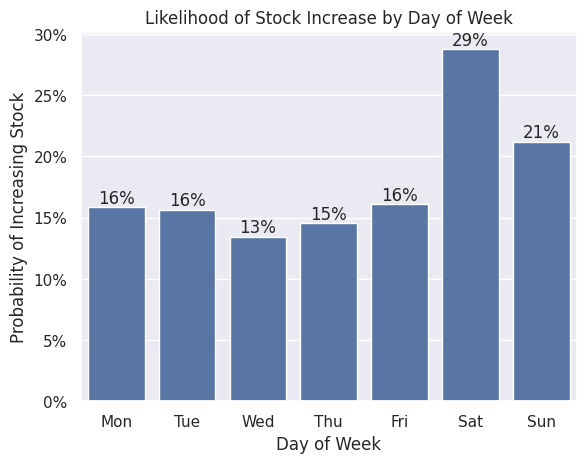

day_of_week
0    0.158333
1    0.156398
2    0.134529
3    0.145455
4    0.161157
5    0.287554
6    0.212121
Name: increase_stock, dtype: float64

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

ax = sns.barplot(
    data=df,
    x='day_of_week',
    y='increase_stock',
    order=[0,1,2,3,4,5,6],
    estimator='mean',
    errorbar=None
)

plt.xticks(
    ticks=range(0,7),
    labels=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
)

plt.xlabel("Day of Week")
plt.ylabel("Probability of Increasing Stock")
plt.title("Likelihood of Stock Increase by Day of Week")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0%}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.show()
df.groupby('day_of_week')['increase_stock'].mean()


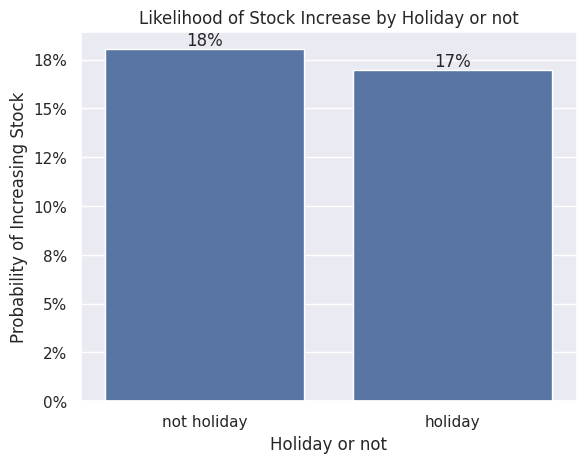

In [94]:
ax = sns.barplot(
    data=df,
    x='holiday',
    y='increase_stock',
    estimator='mean',
    errorbar=None
)

plt.xticks(
    ticks=range(0,2),
    labels=["not holiday", "holiday"]
)

plt.xlabel("Holiday or not")
plt.ylabel("Probability of Increasing Stock")
plt.title("Likelihood of Stock Increase by Holiday or not")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0%}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.show()

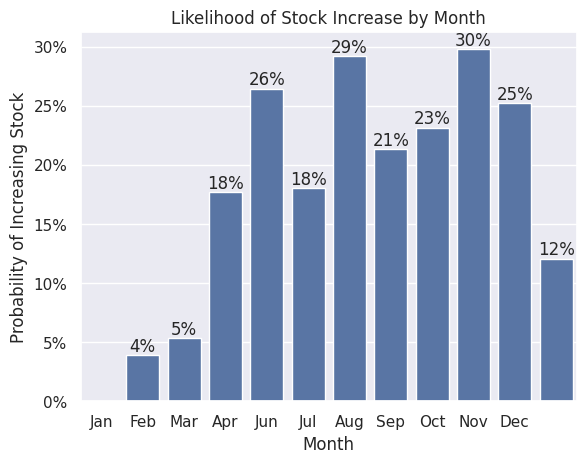

In [95]:
ax = sns.barplot(
    data=df,
    x='month',
    y='increase_stock',
    order=[0,1,2,3,4,5,6,7,8,9,10,11],
    estimator='mean',
    errorbar=None
)

plt.xticks(
    ticks=range(0,11),
    labels=["Jan","Feb","Mar","Apr","Jun","Jul","Aug", "Sep","Oct", "Nov", "Dec"]
)

plt.xlabel("Month")
plt.ylabel("Probability of Increasing Stock")
plt.title("Likelihood of Stock Increase by Month")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0%}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.show()

increase_stock    1.000000
temp              0.336981
humidity          0.308726
hour_of_day       0.240544
summertime        0.216052
dew               0.132663
weekday           0.116446
visibility        0.113443
windspeed         0.096011
day_of_week       0.083688
precip            0.059304
snowdepth         0.047526
cloudcover        0.045534
month             0.037212
holiday           0.004909
Name: increase_stock, dtype: float64


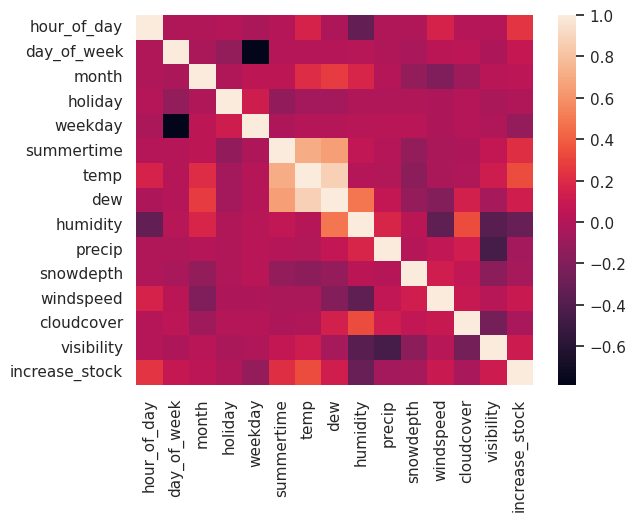

In [96]:
sns.heatmap(df.corr(), annot=False)
df['weekday'].corr(df['holiday'])

corr = df.corr(numeric_only=True)['increase_stock']
sorted_corr = corr.abs().sort_values(ascending=False)
print(sorted_corr)

In [97]:
corr = df.corr()
threshold = 0.5
high_corr_pairs = [
    (i, j, corr.loc[i, j])
    for i in corr.columns
    for j in corr.columns
    if i < j and abs(corr.loc[i, j]) > threshold
]

for f1, f2, c in high_corr_pairs:
    print(f"{f1} and {f2} are highly correlated: {c:.2f}")


day_of_week and weekday are highly correlated: -0.79
summertime and temp are highly correlated: 0.71
dew and summertime are highly correlated: 0.65
dew and temp are highly correlated: 0.87


att göra:
(1) Normalize)
2) Split to train and test
3) Tunea parametrar

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
X = df.drop('increase_stock', axis=1)
y = df['increase_stock']
model = LogisticRegressionCV(
    #class_weight='balanced', # gör det sämre
    Cs=10,          # Try 10 values of C (default logarithmic scale)
    cv=5,           # 5-fold cross-validation
    penalty='l2',
    scoring='accuracy',
    max_iter=1000,
    solver='lbfgs'
)

model.fit(X, y)

print("Best C:", model.C_[0])
print("Cross-validated accuracy scores:", model.scores_[1].mean(axis=0))


Best C: 2.782559402207126
Cross-validated accuracy scores: [0.8375   0.834375 0.841875 0.843125 0.845625 0.849375 0.849375 0.849375
 0.84875  0.84875 ]


In [102]:
df['increase_stock'].value_counts(normalize=True)


increase_stock
0    0.82
1    0.18
Name: proportion, dtype: float64